In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io
import collections
import pandas as pd

from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

## 1. Prepare dataset

In [5]:
%run create_dataset_hologram.py

----- Loading hologram dataset... -----
Hologram dataset loaded (matlab file dictionary)
Hologram dataset shape:  (200, 200, 1500)
Total number of holograms: 1500
Number of holograms per class: 300
Hologram dataset saved in .npy file!

----- Data pre-procesing... -----
Reshaping dataset to 1 dimension...
Dataset 1D shape:  (1500, 40000)
Normalizing dataset...
Normalized dataset shape:  (1500, 40000)
Computing Y_array...
Y_array shape:  (1500,)
Counter({0.0: 300, 1.0: 300, 2.0: 300, 3.0: 300, 4.0: 300})
Y_array saved in a .npy file!

----- Spliting dataset... -----
Trainset: 80.0%, testset: 20.0 %
Data :  (1500, 40000) (1500,)
Train:  (1200, 40000) (1200,)
Test :  (300, 40000) (300,)
X_train, Y_train, X_test, Y_test saved in .npy files!

Done!
Execution time: 94.3477 seconds


<class 'numpy.complex128'>


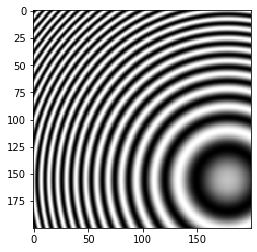

Wall time: 19.2 s


In [6]:
%%time

# Load the dictionary in .npy format
dat = np.load('dat.npy')

# Plot an example
hol = dat[:,:,0]
print(type(hol[0,0]))

plt.imshow(np.real(hol), cmap = 'gray')
plt.show()

## 2. Neural network

**Data pre-processing for neural network**

Reshaped dataset input

In [ ]:
# Reshape the dataset input to the shape that our model expects
# The first number is the number of images, then comes the shape of each image
# The last number is 1, which signifies that the images are greyscale

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print('Train: ', X_train.shape)
print('Test : ', X_test.shape)

'One-hot-encode' the target variable


In [ ]:
# One-hot encode target column: create a column for each category and a binary 
# variable is inputted for each category
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print('Train: ', Y_train.shape)
print(Y_train)
print('Test : ', Y_test.shape)

**Building the model**

In [ ]:
# Create model
model = Sequential() # build a model layer by layer

In [ ]:
# Number of nodes in the first and second layer
nb_nodes_1 = 64
nb_nodes_2 = 32

# Kernel size
k_size = 3

In [ ]:
# Add model layers

# Conv2D layer: 
# 64 nodes, 3x3 filter matrix, Rectified Linear Activation as activation function,
# shape of each input (200, 200, 1,) with 1 signifying images are greyscale
model.add(Conv2D(nb_nodes_1, kernel_size = k_size, activation = 'relu', input_shape = (40000, 1)))

# 32 nodes
model.add(Conv2D(nb_nodes_2, kernel_size = k_size, activation = 'relu'))

# Flatten layer: connection between the convolution and dense layers
model.add(Flatten())

# Dense layer: used for the output layer
# 5 nodes for the output layer, one for each possible outcome (1-5)
# 'softmax' as activation function, it makes the output sump up to 1 so the output
# can be interpreted as probalities
model.add(Dense(nb_class, activation = 'softmax'))

**Compiling the model**

In [ ]:
# Three parameters:
# optmizer: 'adam'
# loss function: 'categorical_crossentropy', the most common choice for classification
# metrics: 'accuracy', to see the accuracy score
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Number of times that the learning algorihm will work through the entire training set
nb_epochs = 10

# Number of samples to work through before updating the interval model parameters
nb_batch = 1

**Training the model**

In [ ]:
%%time

# Number of epochs: number of tmes the model wil cycle trough the data
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = nb_epochs)